# Decision Tree


* 여러분은 OO 통신화사 데이터분석가 입니다.
* 회사는 약정기간이 끝난 고객이 번호이동(이탈)해 가는 문제를 해결하고자 합니다.
* 그래서 여러분에게, 어떤 고객이 번호이동(이탈)해 가는지 예측 모델링을 의뢰하였습니다.

![](https://d18lkz4dllo6v2.cloudfront.net/cumulus_uploads/entry/23964/mobile%20phones.png)

## 0. classification report 관련 복습

귀무가설(H0): 기존에 존재하던 가설
대립가설(H1): 귀무가설과 대비되는 새롭게 제시한 가설, 검증하고자 하는 가설

제 1종오류(alpha): 귀무가설 H0가 참일 때, H0를 기각, 더 위험한 오류
제 2종오류(beta): 귀무가설 H0가 참이 아닐 때, H0를 기각하지 않을 확률

에시:

True Positive: 실제로 양성이고 양성으로 진단

False Positive(alpha): 실제로 음성인데 양성으로 잘못 진단

False Negative(beta): 실제로 양성인데 음성으로 잘못 진단

True Negative: 실제로 음성이고 음성으로 진단


정분류율(Accuracy): 네 가지 분류 가능성 중 올바르게 분류한 비율(TP + TN) 

재현율(Recall): 1 - beta 에 해당하는 값, 검정력(Power)으로도 설명 가능, 제2종오류 beta가 작아질수록 커지는 값

정밀도(Precision): TP / (TP + FP(alpha)), 제1종오류 alpha가 작아질수록 커지는 값

f1-score: recall과 precision의 조화평균, alpha와 beta의 합이 최소가 될 때 최대가 되는 지표

## 1.환경준비

### (1) import

In [124]:
#라이브러리들을 불러오자.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

### (2) 데이터 준비

In [125]:
# 데이터를 불러옵시다.
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/mobile_cust_churn.csv'
data = pd.read_csv(path)
data.head()

,id,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,1,0,31953,0,6,313378,161,0,4,unsat,little,no,STAY
1,2,1,36147,0,13,800586,244,0,6,unsat,little,considering,STAY
2,3,1,27273,230,0,305049,201,16,15,unsat,very_little,perhaps,STAY
3,4,0,120070,38,33,788235,780,3,2,unsat,very_high,considering,LEAVE
4,5,1,29215,208,85,224784,241,21,1,very_unsat,little,never_thought,STAY


* 변수설명
    * COLLEGE : 대학 졸업여부
    * INCOME : 연수입
    * OVERAGE : 월평균 초과사용 시간(분)
    * LEFTOVER : 월평균 잔여시간비율(%)
    * HOUSE : 집값
    * HANDSET_PRICE : 스마트폰 가격
    * OVER_15MINS_CALLS_PER_MONTH : 월평균 장기통화(15분이상) 횟수
    * AVERAGE_CALL_DURATION : 평균 통화 시간
    * REPORTED_SATISFACTION : 만족도 설문조사 결과
    * REPORTED_USAGE_LEVEL : 사용도 자가진단 결과
    * CONSIDERING_CHANGE_OF_PLAN : 향후 변경계획 설문조사 결과
    * CHURN : 이탈(번호이동) 여부 (Target 변수)


## 2.데이터 전처리

### (1) 변수정리
* 불필요한 변수를 정리합시다.
    * 식별자 : 일련번호, 주민번호, 전화번호, 고객ID, 사번
    * 시계열 데이터 중 : 어떤 기간동안 거의 변화가 없는 값.(변동이 거의 없는) 값.


In [126]:
drop_cols = ['id']
data.drop(drop_cols, axis = 1, inplace = True )

### (2) x,y 분할

In [127]:
target = 'CHURN'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

### (3) 가변수화

가변수화를 수행하시오.

In [128]:
dumm_cols = ['REPORTED_SATISFACTION','REPORTED_USAGE_LEVEL','CONSIDERING_CHANGE_OF_PLAN']
x = pd.get_dummies(x, columns = dumm_cols, drop_first = True)

### (4) train, val 분할

In [159]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 20)

## 3.모델링

### (1) 필요한 함수 불러오기

In [130]:
# 모델링을 위해
from sklearn.tree import DecisionTreeClassifier

# 평가를 위해.
from sklearn.metrics import *

### (2) 선언

In [160]:
tree_model = DecisionTreeClassifier()

### (3) 모델링(학습)

In [161]:
tree_model.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### (4) 검증 : 예측

In [162]:
pred = tree_model.predict(x_val)

### (5) 검증 : 평가

* confusion matrix

In [165]:
confusion_matrix(y_val, pred)

array([[1159,  803],
       [ 742, 1296]])

* classification report

In [179]:
print(classification_report(y_val, pred, digits = 4))

              precision    recall  f1-score   support

       LEAVE     0.6097    0.5907    0.6001      1962
        STAY     0.6174    0.6359    0.6265      2038

    accuracy                         0.6138      4000
   macro avg     0.6136    0.6133    0.6133      4000
weighted avg     0.6136    0.6138    0.6135      4000



## 3.Decision Tree 추가 내용

### (1) 모델 시각화

In [178]:
# 시각화
from sklearn.tree import plot_tree

# Decision Tree는 모델을 시각화 할 수 있습니다.
# 약 2분 소요됨
'''plot_tree(tree_model,                       # 만든 모델 이름
        feature_names = x_train.columns,    #Feature 이름, list(x_train)
        filled = True)'''

# 에러: plot_tree의 첫 param 이름을 model로 전달할 시, 
# plot_tree() 내부 param인 model로 인식하는지, 에러 발생함 => tree_model로 변수명 수정 후 정상작동

'plot_tree(tree_model,                       # 만든 모델 이름\n        feature_names = x_train.columns,    #Feature 이름, list(x_train)\n        filled = True)'

* 모델을 작게 만들어 봅시다.

[Text(0.5, 0.875, 'HOUSE <= 600636.0\ngini = 0.5\nsamples = 16000\nvalue = [7890.0, 8110.0]'),
 Text(0.25, 0.625, 'OVERAGE <= 106.5\ngini = 0.486\nsamples = 10611\nvalue = [6179, 4432]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'LEFTOVER <= 24.5\ngini = 0.499\nsamples = 7110\nvalue = [3389, 3721]'),
 Text(0.0625, 0.125, 'gini = 0.483\nsamples = 4713\nvalue = [1926, 2787]'),
 Text(0.1875, 0.125, 'gini = 0.476\nsamples = 2397\nvalue = [1463, 934]'),
 Text(0.375, 0.375, 'REPORTED_SATISFACTION_very_sat <= 0.5\ngini = 0.324\nsamples = 3501\nvalue = [2790, 711]'),
 Text(0.3125, 0.125, 'gini = 0.337\nsamples = 2648\nvalue = [2081, 567]'),
 Text(0.4375, 0.125, 'gini = 0.281\nsamples = 853\nvalue = [709, 144]'),
 Text(0.75, 0.625, 'INCOME <= 100357.5\ngini = 0.433\nsamples = 5389\nvalue = [1711, 3678]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'AVERAGE_CALL_DURATION <= 9.5\ngini = 0.304\nsamples = 3627\nvalue = [679, 2948]'),
 Text(0.5625, 0.125, 'gini = 0.292\nsamples = 27

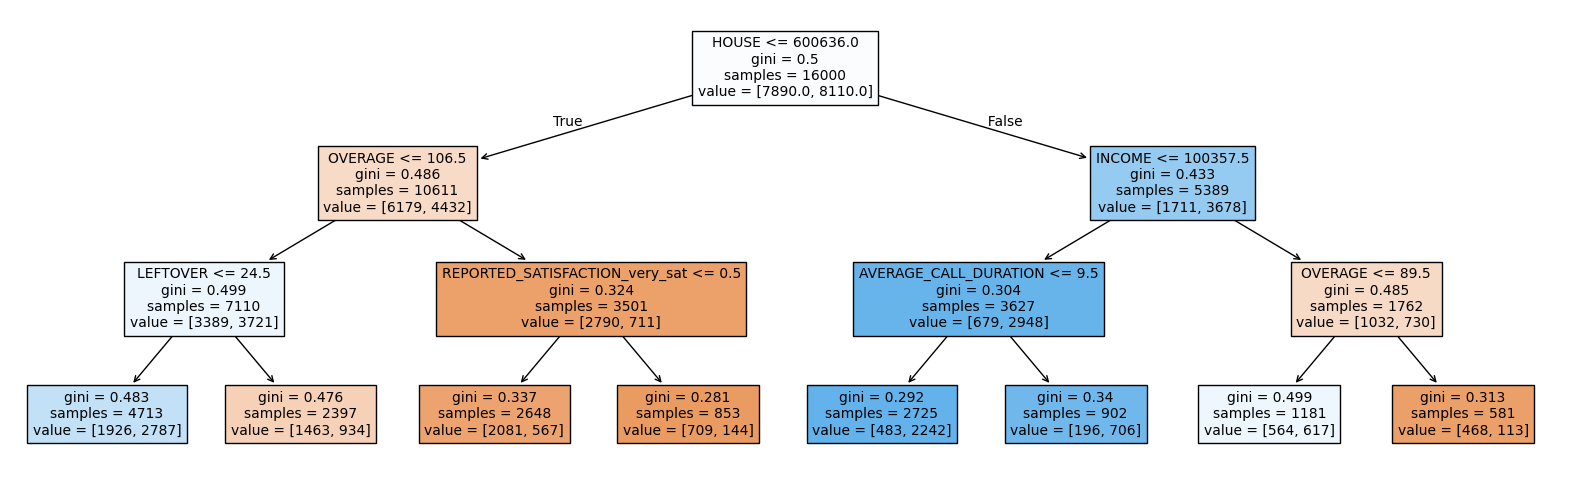

In [177]:
from sklearn.tree import plot_tree
tree_model = DecisionTreeClassifier(max_depth = 3)
tree_model.fit(x_train, y_train)

plt.figure(figsize = (20,6)) # 그림 사이즈 조절
plot_tree(tree_model, feature_names = x_train.columns,
        filled = True, fontsize = 10)

### (2) 변수 중요도

In [180]:
# 변수 중요도
# 각 feature별로 모델링에 기여하는 정도가 달라짐. 이를 scaling하기 위한 선행 작업 필요
print(x_train.columns)
print(tree_model.feature_importances_)

Index(['COLLEGE', 'INCOME', 'OVERAGE', 'LEFTOVER', 'HOUSE', 'HANDSET_PRICE',
       'OVER_15MINS_CALLS_PER_MONTH', 'AVERAGE_CALL_DURATION',
       'REPORTED_SATISFACTION_sat', 'REPORTED_SATISFACTION_unsat',
       'REPORTED_SATISFACTION_very_sat', 'REPORTED_SATISFACTION_very_unsat',
       'REPORTED_USAGE_LEVEL_high', 'REPORTED_USAGE_LEVEL_little',
       'REPORTED_USAGE_LEVEL_very_high', 'REPORTED_USAGE_LEVEL_very_little',
       'CONSIDERING_CHANGE_OF_PLAN_considering',
       'CONSIDERING_CHANGE_OF_PLAN_never_thought',
       'CONSIDERING_CHANGE_OF_PLAN_no', 'CONSIDERING_CHANGE_OF_PLAN_perhaps'],
      dtype='object')
[0.         0.2388273  0.35827047 0.08197161 0.31787256 0.
 0.         0.00137839 0.         0.         0.00167967 0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]


* 변수중요도 그래프 그리기 함수 만들기

In [181]:
def plot_feature_importance(importance, names):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_df.reset_index(drop=True, inplace = True)

    plt.figure(figsize=(10,8))
    sns.barplot(x='feature_importance', y='feature_names', data = fi_df)

    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    plt.grid()

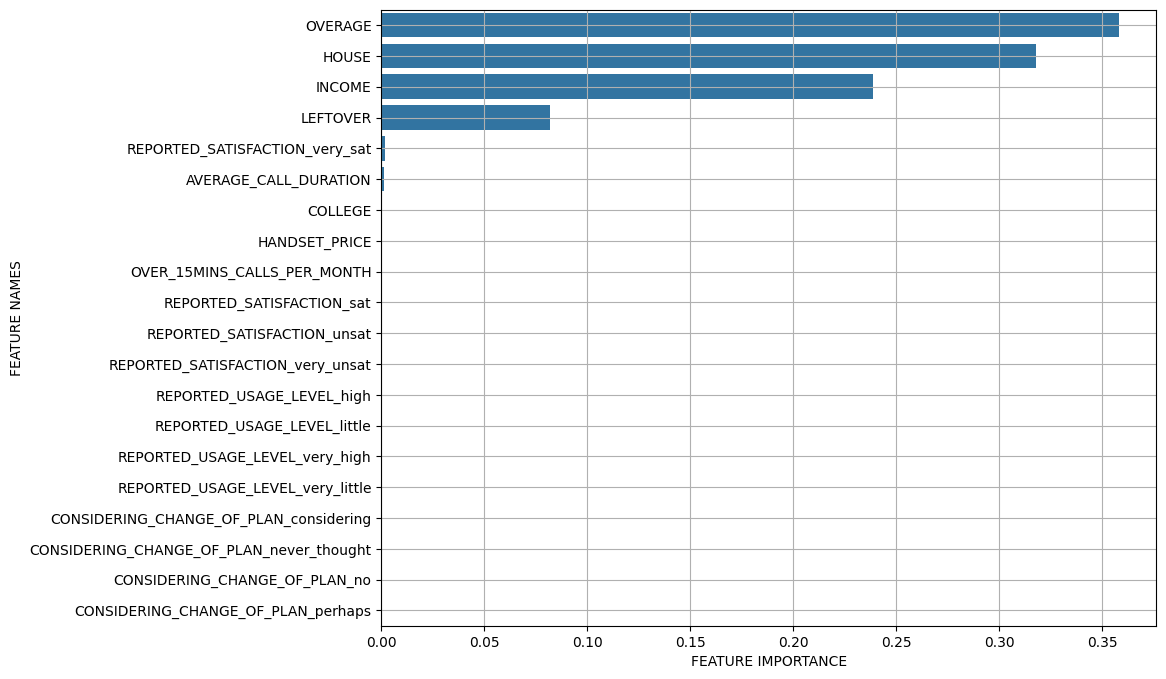

In [143]:
plot_feature_importance(tree_model.feature_importances_, list(x_train))

### (3) 실습 Hyper Parameter 다루기
* 다음의 조건으로 모델 생성, 시각화, 성능 비교를 수행해 봅시다.
    * max_depth : 1,2,3,4,5


In [52]:
def evaluate_tree(depth):
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(x_train, y_train)
    pred = model.predict(x_val)
    print(confusion_matrix(y_val, pred))
    print(classification_report(y_val, pred, digits = 4))
    
    plot_tree(model, feature_names = x_train.columns, filled=True)
    
    print(model.feature_importances_)
    plot_feature_importance(model.feature_importances_, list(x_train))

[[1525  437]
 [1097  941]]
              precision    recall  f1-score   support

       LEAVE     0.5816    0.7773    0.6654      1962
        STAY     0.6829    0.4617    0.5509      2038

    accuracy                         0.6165      4000
   macro avg     0.6322    0.6195    0.6081      4000
weighted avg     0.6332    0.6165    0.6071      4000

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


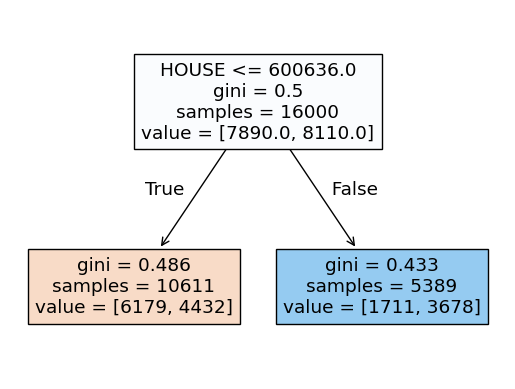

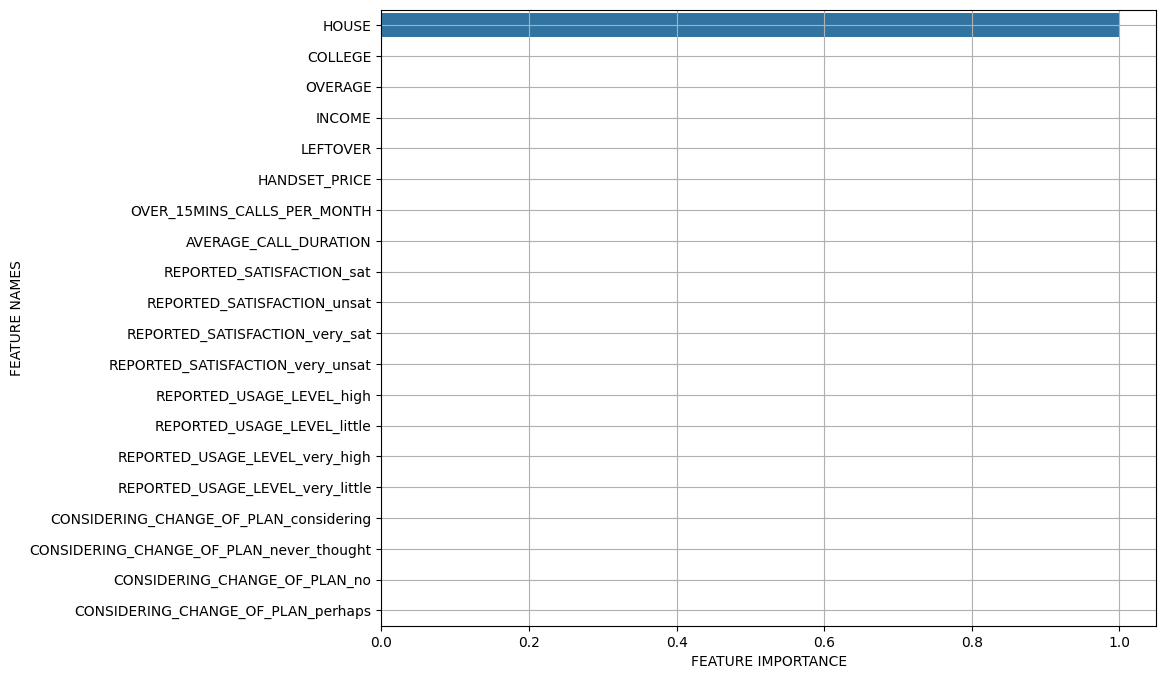

In [53]:
evaluate_tree(1)

[[ 959 1003]
 [ 399 1639]]
              precision    recall  f1-score   support

       LEAVE     0.7062    0.4888    0.5777      1962
        STAY     0.6204    0.8042    0.7004      2038

    accuracy                         0.6495      4000
   macro avg     0.6633    0.6465    0.6391      4000
weighted avg     0.6625    0.6495    0.6402      4000

[0.         0.27710874 0.35406715 0.         0.3688241  0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]


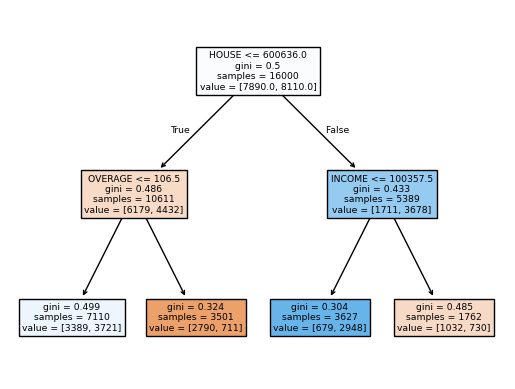

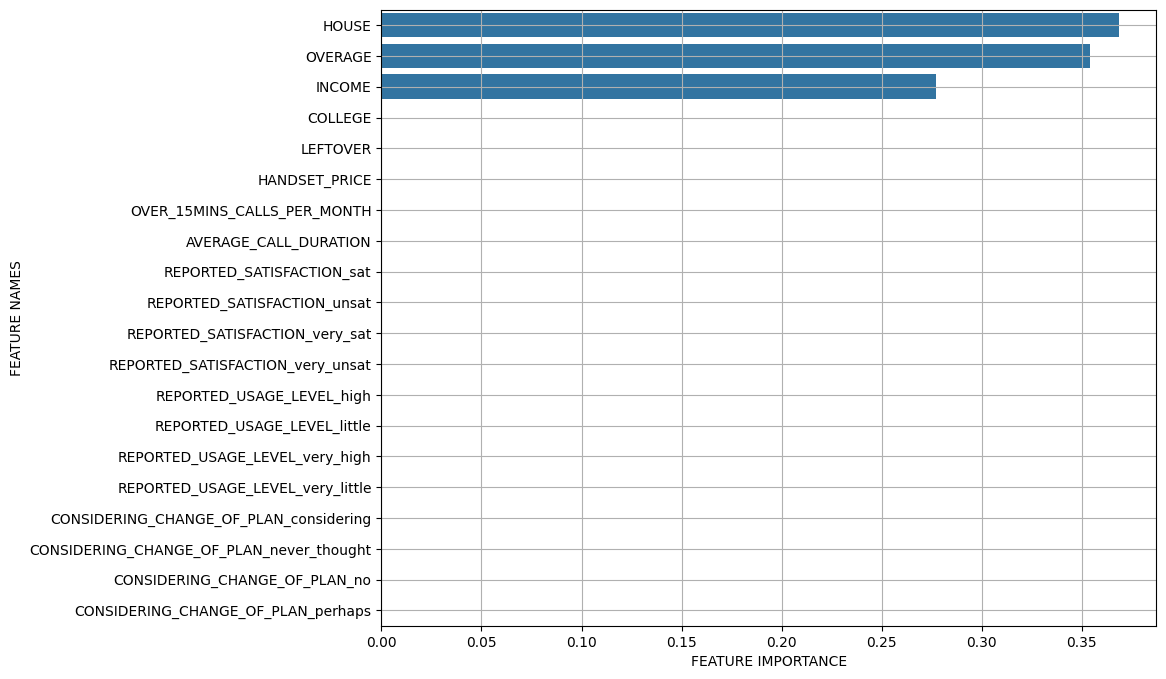

In [54]:
evaluate_tree(2)

[[1163  799]
 [ 443 1595]]
              precision    recall  f1-score   support

       LEAVE     0.7242    0.5928    0.6519      1962
        STAY     0.6662    0.7826    0.7198      2038

    accuracy                         0.6895      4000
   macro avg     0.6952    0.6877    0.6858      4000
weighted avg     0.6947    0.6895    0.6865      4000

[0.         0.2388273  0.35827047 0.08197161 0.31787256 0.
 0.         0.00137839 0.         0.         0.00167967 0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]


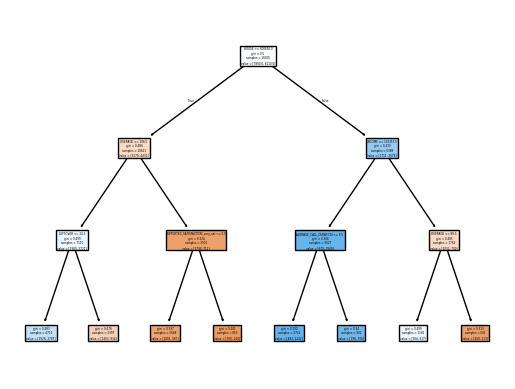

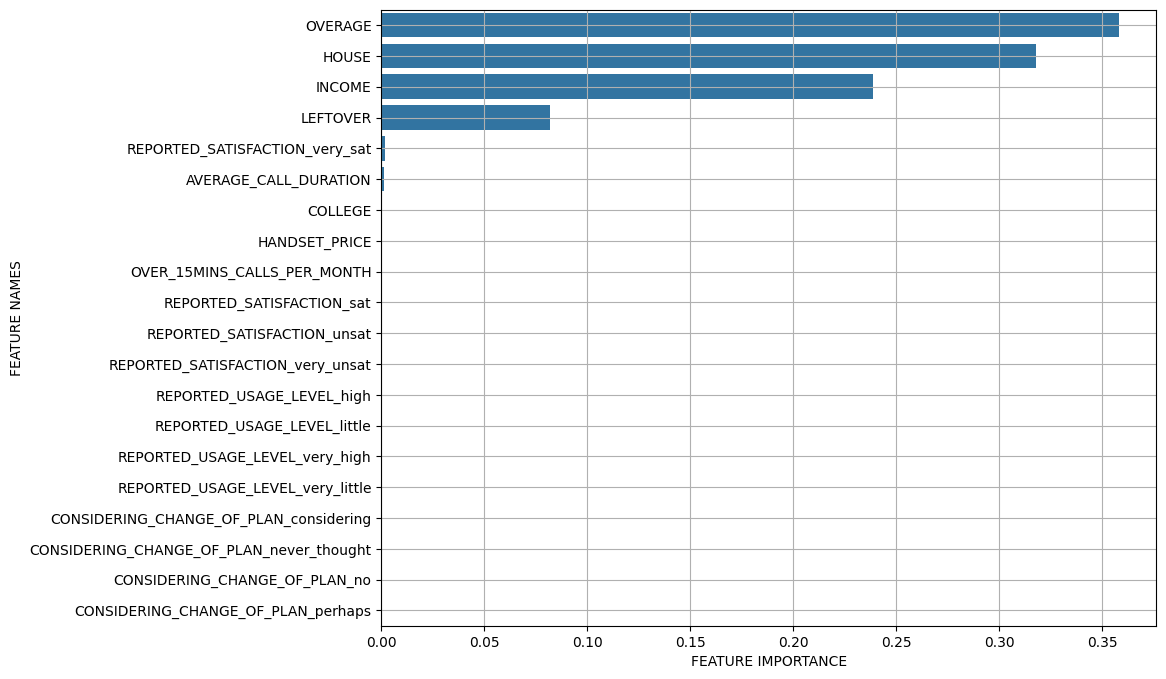

In [55]:
evaluate_tree(3)

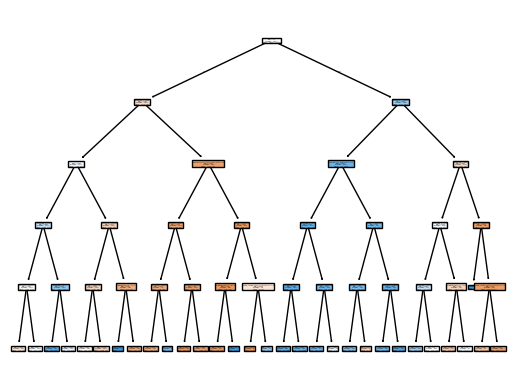

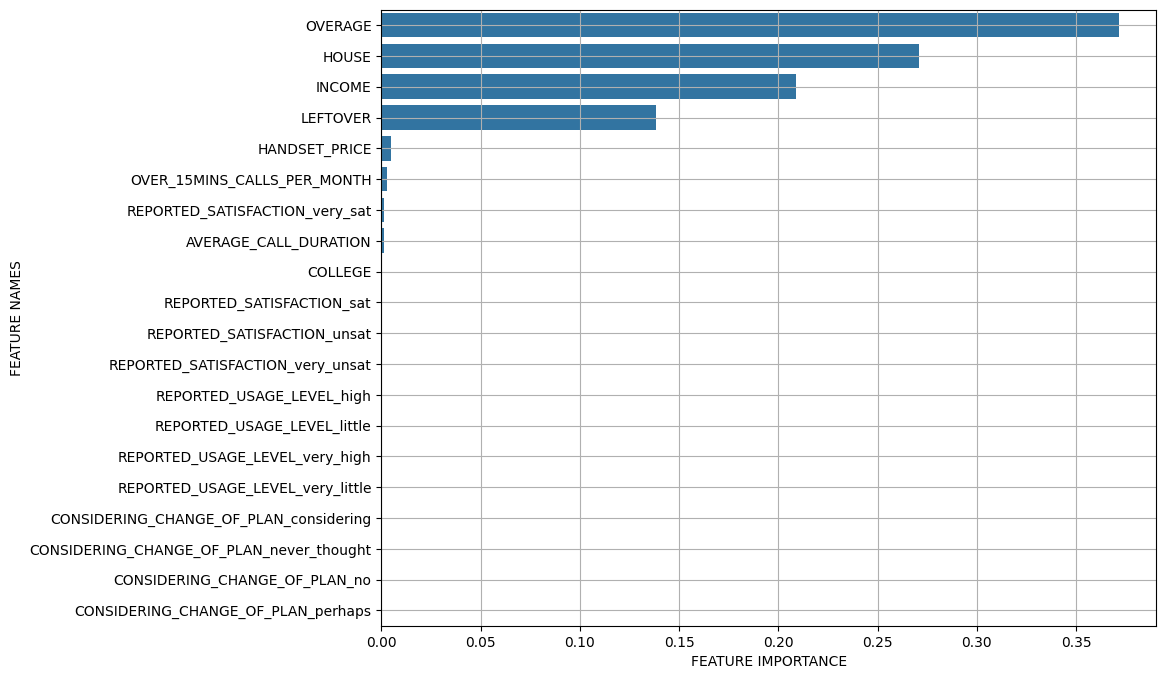

In [48]:
evaluate_tree(5)